<a href="https://colab.research.google.com/github/ar1vit0r/paipe/blob/main/Paipe_Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install odfpy # dependencia necessária para carregar um arquivo .ods

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error

In [44]:
df_test = pd.read_csv('test_houses.csv', delimiter=',')

In [45]:
df_train = pd.read_excel('train_houses.ods')  # colunas mal delimitadas nos dados de treinamento

In [46]:
# Carregar o CSV que tem os dados em uma única coluna, com a primeira linha como rótulo
df_train.to_csv('train_houses.csv', index=False)
df_train = pd.read_csv('train_houses.csv', delimiter=',')

# Dividir a coluna com base no delimitador ','
df_train = df_train.iloc[:, 0].str.split(',', expand=True)
df_train.to_csv('train_houses.csv', index=False)

In [47]:
cols_to_drop = df_train.columns[-4:]  # para igualar o número de colunas dos dataframes, removi as colunas finais pois são nulas
df_train = df_train.drop(columns=cols_to_drop)
df_train = df_train.drop(columns=df_train.columns[0]) # como não é citada no arquivo pdf, nem consta no dataframe de teste, a primeira coluna foi removida
df_train.columns = df_test.columns

In [48]:
df_train.describe()

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,...,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,TradePrice
count,325260,325260,325260,325260,325260,325260,325260,325260,325260,325260,...,325260,325260,325260,325260,325260,325260,325260,325260,325260,162520
unique,6,60,51,60,1453,1688,668,70,38,34,...,314,242,135,117,96,92,86,66,499,428
top,Residential Area,,Tokyo,Tokyo,Ota Ward,Hachioji,8,6,6.0,,...,,60.0,80.0,200.0,2013,3,,,,20000000
freq,157201,147639,177621,147639,9497,2294,12563,14309,26790,183283,...,148468,73060,109546,41287,13830,42317,163323,168228,156789,5040


In [49]:
df_test.describe()

,Region,MinTimeToNearestStation,MaxTimeToNearestStation,Area,AreaIsGreaterFlag,UnitPrice,LandShape,TotalFloorArea,TotalFloorAreaIsGreaterFlag,BuildingYear,Classification,CoverageRatio,Year,Quarter,TradePrice
count,40888.000000,75478.000000,34966.000000,77520.000000,5.236100e+04,1.572900e+04,37187.000000,40888.000000,60208.000000,76624.000000,39965.000000,76329.000000,77520.000000,36632.000000,0.0
mean,13152.983027,11.161120,7.955442,22.742402,1.267519e+05,1.394734e+06,9.437492,0.002079,783.806471,931.321388,5.860313,128.147231,952.448207,2.488453,NaN
std,49.602932,11.358499,6.924323,30.385132,3.037766e+05,1.410481e+06,6.487892,0.045548,977.078990,996.234186,4.145343,97.574302,1003.609954,1.122984,NaN
min,13101.000000,0.000000,0.000000,0.000000,0.000000e+00,5.400000e+01,0.400000,0.000000,0.000000,0.000000,1.000000,30.000000,1.000000,1.000000,NaN
25%,13113.000000,5.000000,4.000000,0.000000,0.000000e+00,6.800000e+05,5.700000,0.000000,0.000000,0.000000,4.000000,60.000000,2.000000,1.000000,NaN
50%,13121.000000,8.000000,7.000000,0.000000,0.000000e+00,1.100000e+06,8.000000,0.000000,0.000000,0.000000,5.000000,80.000000,4.000000,2.000000,NaN
75%,13207.000000,13.000000,10.000000,45.000000,1.600000e+05,1.800000e+06,11.000000,0.000000,2002.000000,1999.000000,6.000000,200.000000,2013.000000,3.000000,NaN
max,13421.000000,120.000000,120.000000,1000.000000,1.300000e+07,4.200000e+07,50.000000,1.000000,2020.000000,2019.000000,60.000000,1300.000000,2019.000000,4.000000,NaN


Arrumando tipos dos dados

In [50]:
df_train['MinTimeToNearestStation'] = pd.to_numeric(df_train['MinTimeToNearestStation'], errors='coerce')
df_train['MaxTimeToNearestStation'] = pd.to_numeric(df_train['MaxTimeToNearestStation'], errors='coerce')
df_train['Area'] = pd.to_numeric(df_train['Area'], errors='coerce')
df_train['UnitPrice'] = pd.to_numeric(df_train['UnitPrice'], errors='coerce')
df_train['Frontage'] = pd.to_numeric(df_train['Frontage'], errors='coerce')
df_train['TotalFloorArea'] = pd.to_numeric(df_train['TotalFloorArea'], errors='coerce')
df_train['BuildingYear'] = pd.to_numeric(df_train['BuildingYear'], errors='coerce')
df_train['CoverageRatio'] = pd.to_numeric(df_train['CoverageRatio'], errors='coerce')
df_train['AreaIsGreaterFlag'] = pd.to_numeric(df_train['AreaIsGreaterFlag'], errors='coerce')
df_train['FrontageIsGreaterFlag'] = pd.to_numeric(df_train['FrontageIsGreaterFlag'], errors='coerce')
df_train['TotalFloorAreaIsGreaterFlag'] = pd.to_numeric(df_train['TotalFloorAreaIsGreaterFlag'], errors='coerce')
df_train['PrewarBuilding'] = pd.to_numeric(df_train['PrewarBuilding'], errors='coerce')
df_train['FloorAreaRatio'] = pd.to_numeric(df_train['FloorAreaRatio'], errors='coerce')
df_train['TradePrice'] = pd.to_numeric(df_train['TradePrice'], errors='coerce')

In [51]:
df_test['MinTimeToNearestStation'] = pd.to_numeric(df_test['MinTimeToNearestStation'], errors='coerce')
df_test['MaxTimeToNearestStation'] = pd.to_numeric(df_test['MaxTimeToNearestStation'], errors='coerce')
df_test['Area'] = pd.to_numeric(df_test['Area'], errors='coerce')
df_test['UnitPrice'] = pd.to_numeric(df_test['UnitPrice'], errors='coerce')
df_test['Frontage'] = pd.to_numeric(df_test['Frontage'], errors='coerce')
df_test['TotalFloorArea'] = pd.to_numeric(df_test['TotalFloorArea'], errors='coerce')
df_test['BuildingYear'] = pd.to_numeric(df_test['BuildingYear'], errors='coerce')
df_test['CoverageRatio'] = pd.to_numeric(df_test['CoverageRatio'], errors='coerce')
df_test['AreaIsGreaterFlag'] = pd.to_numeric(df_test['AreaIsGreaterFlag'], errors='coerce')
df_test['FrontageIsGreaterFlag'] = pd.to_numeric(df_test['FrontageIsGreaterFlag'], errors='coerce')
df_test['TotalFloorAreaIsGreaterFlag'] = pd.to_numeric(df_test['TotalFloorAreaIsGreaterFlag'], errors='coerce')
df_test['PrewarBuilding'] = pd.to_numeric(df_test['PrewarBuilding'], errors='coerce')
df_test['FloorAreaRatio'] = pd.to_numeric(df_test['FloorAreaRatio'], errors='coerce')
df_test['TradePrice'] = pd.to_numeric(df_test['TradePrice'], errors='coerce')

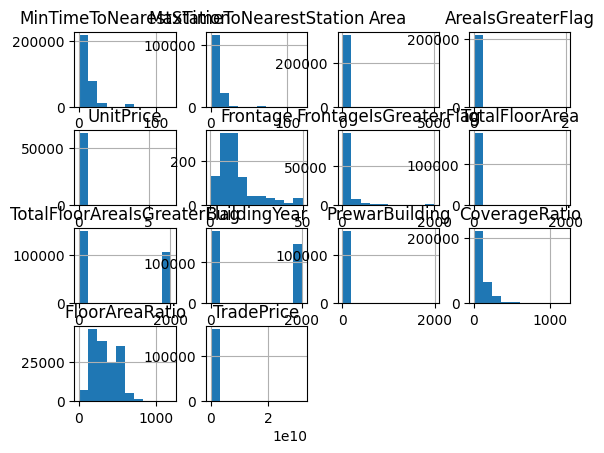

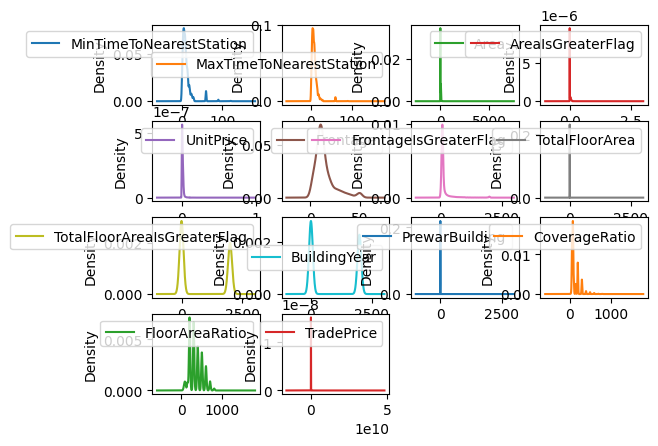

In [52]:
df_train.hist()
plt.show()
shapiro(df_train['TradePrice'])

df_train.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
plt.show()

Corrigidos os problemas na delimitação dos dados, começa o tratamento

Preenchimento dos valores numéricos faltantes utilizando a média

In [53]:
df_train_numeric = df_train.select_dtypes(include=['float64', 'int64'])
df_test_numeric = df_test.select_dtypes(include=['float64', 'int64'])

df_train_numeric = df_train.select_dtypes(include=['number']).fillna(df_train_numeric.mean())
df_test_numeric = df_test.select_dtypes(include=['number']).fillna(df_test_numeric.mean())

# Combine back the numeric and non-numeric columns
df_train_non_numeric = df_train.select_dtypes(exclude=['number'])  # Non-numeric columns are left unchanged
df_test_non_numeric = df_test.select_dtypes(exclude=['number'])

df_train = pd.concat([df_train_numeric, df_train_non_numeric], axis=1)
df_test = pd.concat([df_test_numeric, df_test_non_numeric], axis=1)

In [54]:
df_train = df_train.dropna() # remove valores faltantes das outras variáveis

Remover valores duplicados

In [55]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

Eliminação de váriaveis


Quando você tem variáveis ​​categóricas com muitas categorias exclusivas, como DistrictName, Municipality, NearestStation, landshape... A codificação one-hot  cria muitas colunas, o que retarda o treinamento ou pode levar ao overfitting.

In [56]:
#one hot encode categorical variables
#df_train = pd.get_dummies(df_train, columns=['Type', 'Region'], drop_first=True)
#df_test = pd.get_dummies(df_test, columns=['Type', 'Region'], drop_first=True)

# Apply label encoding to ordinal variables
le = LabelEncoder()
df_train['Purpose'] = le.fit_transform(df_train['Purpose'])
df_test['Purpose'] = le.fit_transform(df_test['Purpose'])

columns_to_drop = ['Type', 'Region', 'MunicipalityCode', 'Prefecture', 'Municipality', 'DistrictName', 'NearestStation','TimeToNearestStation', 'FloorPlan', 'PricePerTsubo', 'LandShape', 'Structure', 'Use', 'Direction', 'Classification', 'Breadth', 'CityPlanning', 'Period', 'Year', 'Quarter', 'Renovation', 'Remarks'] # data/time? TimeToNearestStation and year
df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322779 entries, 0 to 325259
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MinTimeToNearestStation      322779 non-null  float64
 1   MaxTimeToNearestStation      322779 non-null  float64
 2   Area                         322779 non-null  float64
 3   AreaIsGreaterFlag            322779 non-null  float64
 4   UnitPrice                    322779 non-null  float64
 5   Frontage                     322779 non-null  float64
 6   FrontageIsGreaterFlag        322779 non-null  float64
 7   TotalFloorArea               322779 non-null  float64
 8   TotalFloorAreaIsGreaterFlag  322779 non-null  float64
 9   BuildingYear                 322779 non-null  float64
 10  PrewarBuilding               322779 non-null  float64
 11  CoverageRatio                322779 non-null  float64
 12  FloorAreaRatio               322779 non-null  float64
 13  Trad

In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76950 entries, Pre-owned Condominiums to Pre-owned Condominiums
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MinTimeToNearestStation      76950 non-null  float64
 1   MaxTimeToNearestStation      76950 non-null  float64
 2   Area                         76950 non-null  float64
 3   AreaIsGreaterFlag            76950 non-null  float64
 4   UnitPrice                    76950 non-null  float64
 5   Frontage                     76950 non-null  float64
 6   FrontageIsGreaterFlag        76950 non-null  float64
 7   TotalFloorArea               76950 non-null  float64
 8   TotalFloorAreaIsGreaterFlag  76950 non-null  float64
 9   BuildingYear                 76950 non-null  float64
 10  PrewarBuilding               76950 non-null  float64
 11  CoverageRatio                76950 non-null  float64
 12  FloorAreaRatio               76950 non-nu

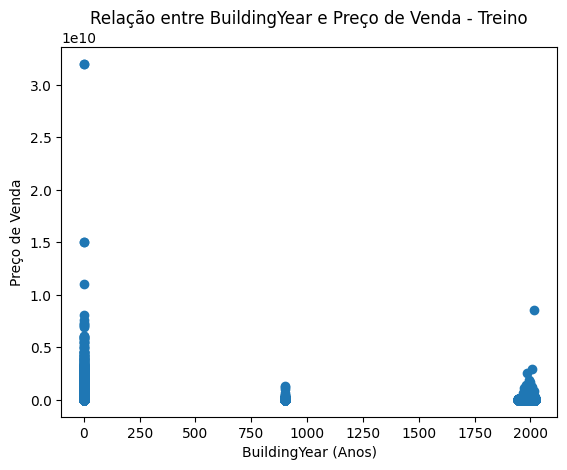

In [59]:
plt.scatter(df_train['BuildingYear'], df_train['TradePrice'])
plt.title('Relação entre BuildingYear e Preço de Venda - Treino')
plt.xlabel('BuildingYear (Anos)')
plt.ylabel('Preço de Venda')
plt.show()

Analise de amostra dos dados de treinamento

In [60]:
# Amostragem para melhor visualização
sample_data = df_train.sample(n=100, random_state=42)

In [61]:
# Define a function to plot histograms for each feature
def plot_histograms(df):
    num_features = len(df.columns)
    num_cols = 3  # Number of columns for subplot
    num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Number of rows needed

    plt.figure(figsize=(10, num_rows * 5))

    for i, column in enumerate(df.columns):
        plt.subplot(num_rows, num_cols, i + 1)
        df[column].hist(bins=30, edgecolor='black')
        plt.title(column)
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

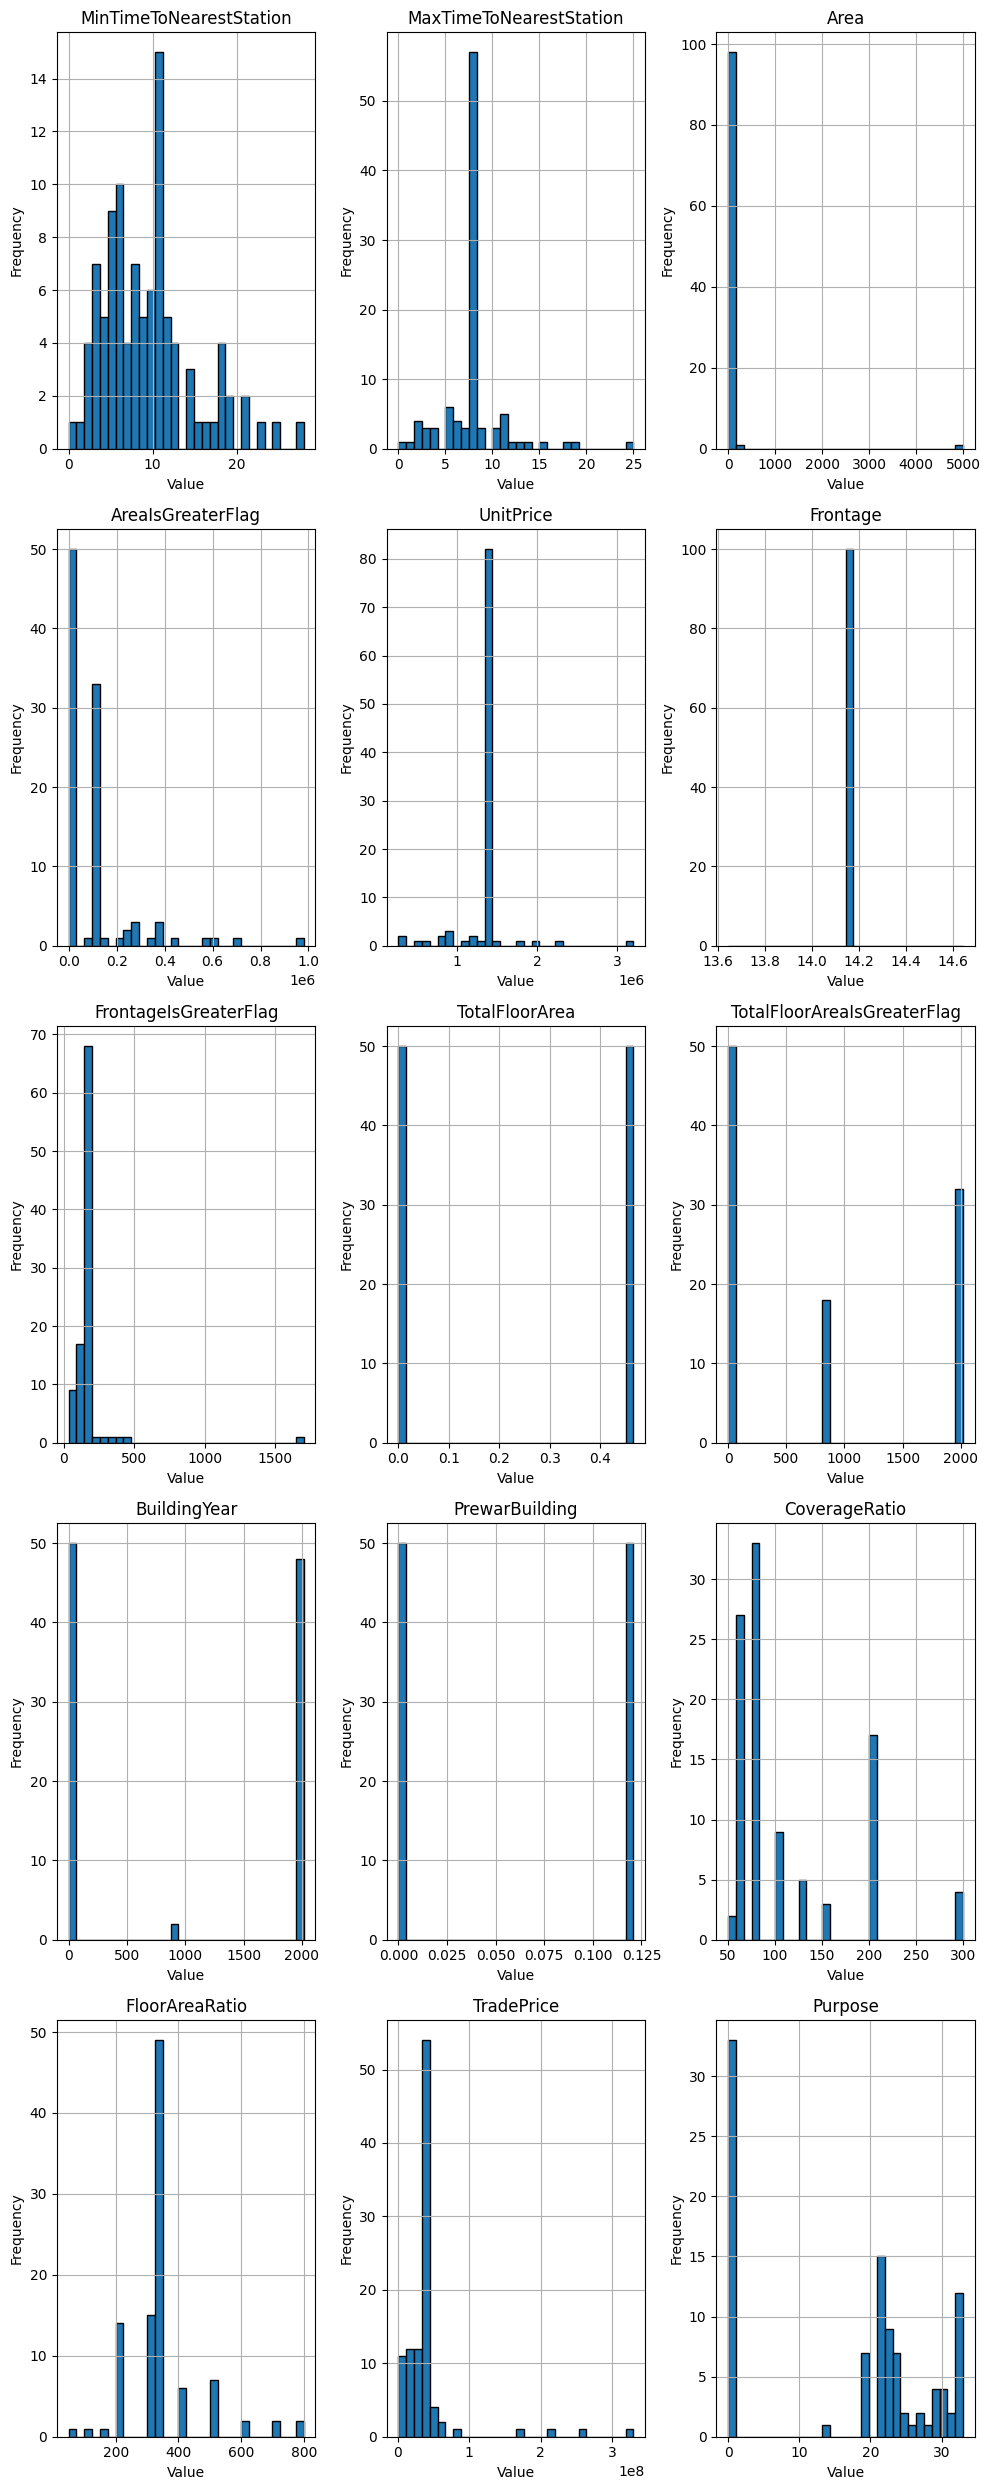

In [62]:
plot_histograms(sample_data)

In [63]:
df_train_numeric_sample = sample_data.select_dtypes(include=['float64', 'int64'])

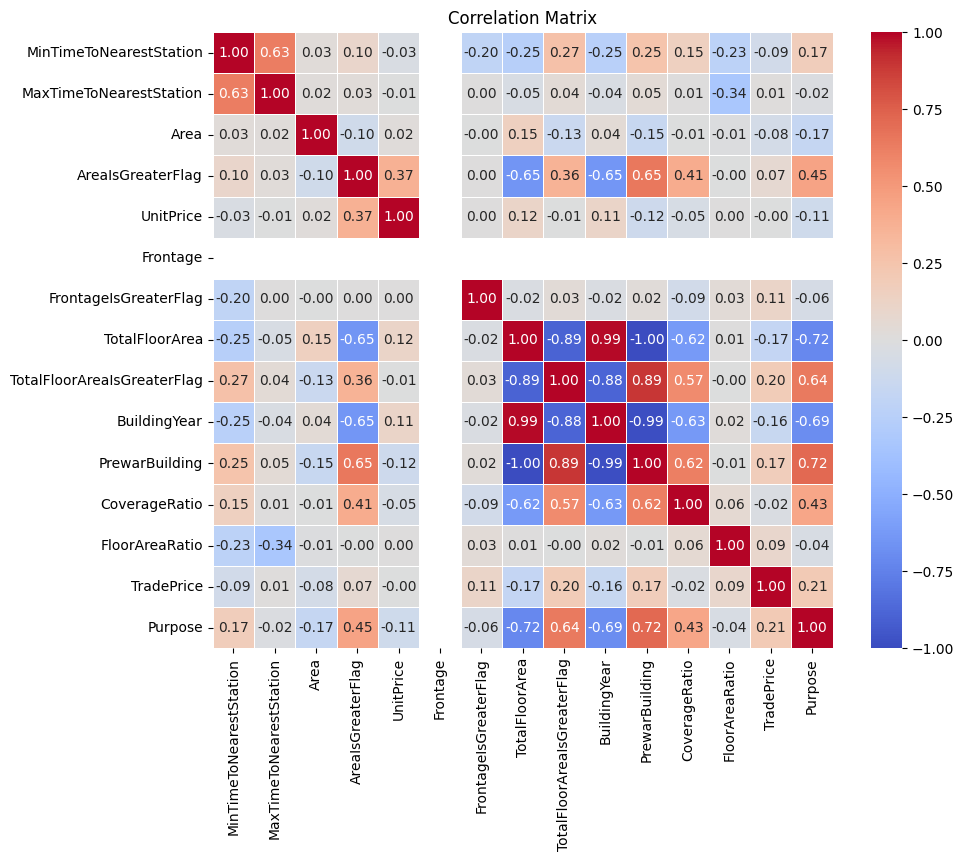

In [64]:
if not df_train_numeric_sample.empty:
  # Correlation matrix for numerical features
  correlation_matrix = df_train_numeric_sample.corr()

  # Visualize the correlation matrix
  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
  plt.title('Correlation Matrix')
  plt.show()
else:
  print("The dataframe is empty.")

totalAreaisgreaterthanflag, totalfloorarea, buildingyear, prewarebuilding removidas por possuirem correlação muito alta(80%+)  a fim de evitar multicolinearidade

In [65]:
columns_to_drop = ['TotalFloorAreaIsGreaterFlag', 'TotalFloorArea', 'BuildingYear', 'PrewarBuilding']
df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

**Insight 1:** Distribuição dos Preços dos Imóveis

Verifica-se que os preços não seguem uma distribuição normal,  há presença de alguns outliers e é uma distribuição assimétrica.

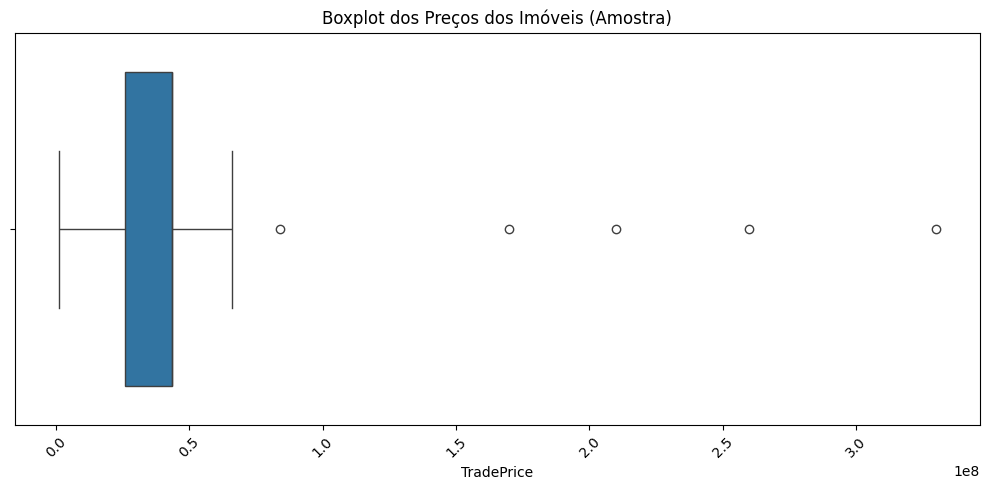

In [66]:
# Gráfico de caixa para preços
plt.figure(figsize=(10, 5))
sns.boxplot(x=sample_data['TradePrice'])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Boxplot dos Preços dos Imóveis (Amostra)')
plt.xlabel('TradePrice')
plt.tight_layout()
plt.show()

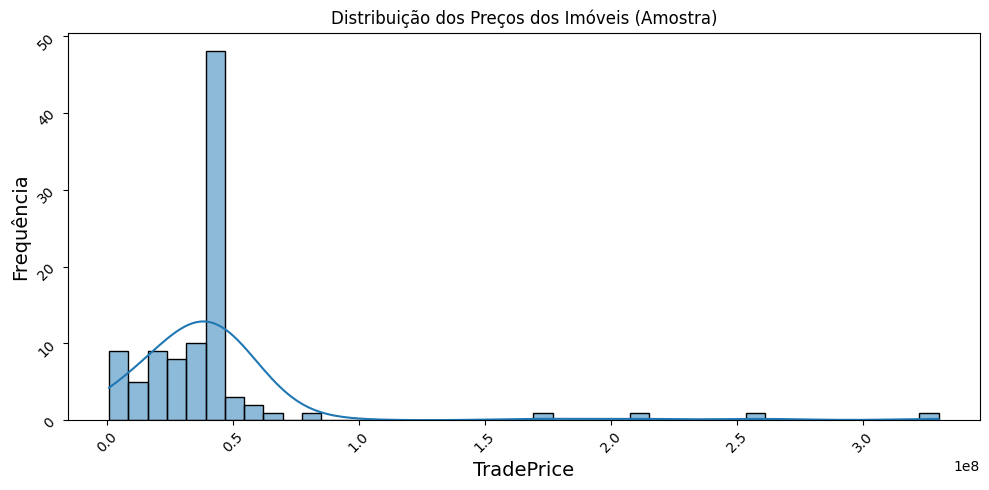

In [67]:
plt.figure(figsize=(10, 5))
sns.histplot(sample_data['TradePrice'], kde=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Distribuição dos Preços dos Imóveis (Amostra)')
plt.xlabel('TradePrice', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.tight_layout()
plt.show()

**Insight 2:** Relação entre Preço e tamanho(área) do imóvel

Identificado um padrão entre preço e área. O preço aumenta conforme a área, isso  indica uma relação positiva entre essas variáveis.

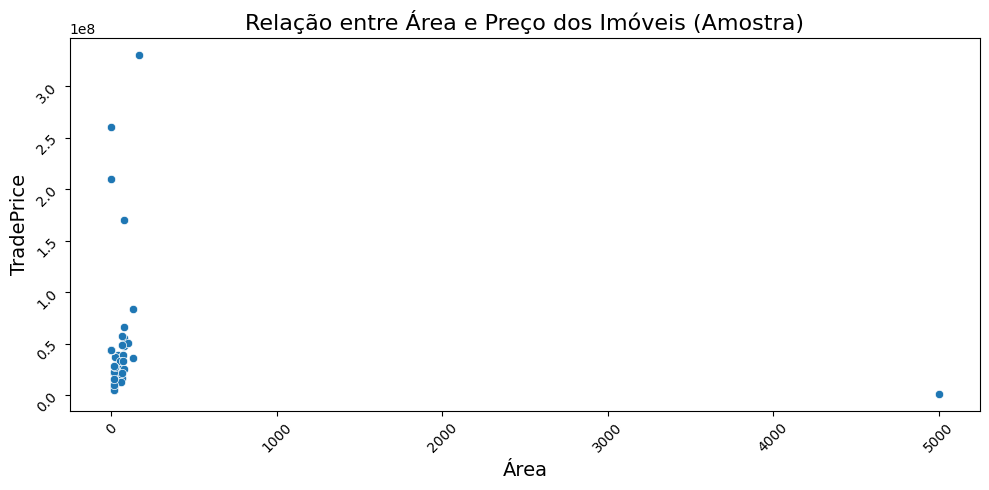

In [68]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Area', y='TradePrice', data=sample_data) # grafico de dispersão
plt.title('Relação entre Área e Preço dos Imóveis (Amostra)', fontsize=16)
plt.xlabel('Área', fontsize=14)
plt.ylabel('TradePrice', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

**Começa o treinamento**

Como a variavel a ser predita é continua, visto que são valores em ponto flutuante, será escolhido um modelo de regressão, mas especificamente, Árvore de Decisão. Esse modelo é uma escolha comum para problemas de regressão, pois pode capturar relações não lineares e interações entre variáveis. Irei comparar com RandomForestRegressor

As árvores de decisão são uma escolha popular para problemas de regressão por várias razões, como: Pouco pré-processamento necessário: Árvores de decisão não exigem que os dados sejam normalizados ou padronizados; Resistente a outliers: Como as divisões são baseadas em medianas ou outros critérios robustos, outliers têm menos impacto sobre o modelo; Interpretação de importância das variáveis: Árvores de decisão fornecem uma maneira clara de visualizar a importância de cada variável na predição, o que pode ajudar a identificar quais características são mais influentes.

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322779 entries, 0 to 325259
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MinTimeToNearestStation  322779 non-null  float64
 1   MaxTimeToNearestStation  322779 non-null  float64
 2   Area                     322779 non-null  float64
 3   AreaIsGreaterFlag        322779 non-null  float64
 4   UnitPrice                322779 non-null  float64
 5   Frontage                 322779 non-null  float64
 6   FrontageIsGreaterFlag    322779 non-null  float64
 7   CoverageRatio            322779 non-null  float64
 8   FloorAreaRatio           322779 non-null  float64
 9   TradePrice               322779 non-null  float64
 10  Purpose                  322779 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 29.6 MB


In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76950 entries, Pre-owned Condominiums to Pre-owned Condominiums
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MinTimeToNearestStation  76950 non-null  float64
 1   MaxTimeToNearestStation  76950 non-null  float64
 2   Area                     76950 non-null  float64
 3   AreaIsGreaterFlag        76950 non-null  float64
 4   UnitPrice                76950 non-null  float64
 5   Frontage                 76950 non-null  float64
 6   FrontageIsGreaterFlag    76950 non-null  float64
 7   CoverageRatio            76950 non-null  float64
 8   FloorAreaRatio           76950 non-null  float64
 9   TradePrice               0 non-null      float64
 10  Purpose                  76950 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 7.0+ MB


Variaveis continuas foram mantidas visto que modelos de regressão se saem melhor com este tipo de variáveis, as outras variaveis foram descartadas visto que um alto numero de features não melhora o modelo, pelo contrário, tende a prejudica-lo.

Treinamento

A Divisão do Conjunto de Treino (Train/Validation Split) foi a abordagem de validação escolhida visto que a Validação Cruzada (Cross-Validation) é recomendada para conjuntos de dados menores.

In [71]:
# Separar as features e o alvo do conjunto de treino
X_train = df_train.drop('TradePrice', axis=1)
y_train = df_train['TradePrice']

# Dividir os dados de treino em conjunto de treino e validação
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = DecisionTreeRegressor(random_state=42)

model.fit(X_train_split, y_train_split)
model2.fit(X_train_split, y_train_split)

DecisionTreeRegressor(random_state=42)

Validação

RandomForestRegressor

In [72]:
# Fazer previsões no conjunto de validação
y_val_pred = model.predict(X_val_split)

# Calculate evaluation metrics
mape = mean_absolute_percentage_error(y_val_split, y_val_pred)
msle = mean_squared_log_error(y_val_split, y_val_pred)
rmsle = np.sqrt(msle)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"RMSLE: {rmsle}")

Mean Absolute Percentage Error (MAPE): 96.79%
RMSLE: 0.379682879739294


DecisionTreeRegressor

In [73]:
# Fazer previsões no conjunto de validação
y_val_pred = model2.predict(X_val_split)

# Calculate evaluation metrics
mape = mean_absolute_percentage_error(y_val_split, y_val_pred)
msle = mean_squared_log_error(y_val_split, y_val_pred)
rmsle = np.sqrt(msle)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"RMSLE: {rmsle}")

Mean Absolute Percentage Error (MAPE): 1.74%
RMSLE: 0.38471801894536445



Ao utilizar o modelo RandomForestRegressor o fato de o MAPE ser muito alto e o RMSLE estar em um nível moderado sugere que o modelo pode estar cometendo grandes erros relativos em valores menores, já que o MAPE penaliza erros relativos em valores baixos, enquanto o RMSLE trata melhor essas discrepâncias ao focar em diferenças logarítmicas.

Já ao utilizar o DecisionTreeRegressor o MAPE de 1.74% significa que o erro percentual médio nas previsões é bastante baixo, indicando que o modelo está prevendo os valores com alta precisão. Sugerindo que o modelo está acertando bem, inclusive para valores pequenos. Um RMSLE de 0.385, embora um pouco maior do que o MAPE sugere, ainda indica que o modelo está desempenhando bem. Isso pode sugerir que o modelo é robusto em relação a diferenças relativas entre os valores grandes e pequenos.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


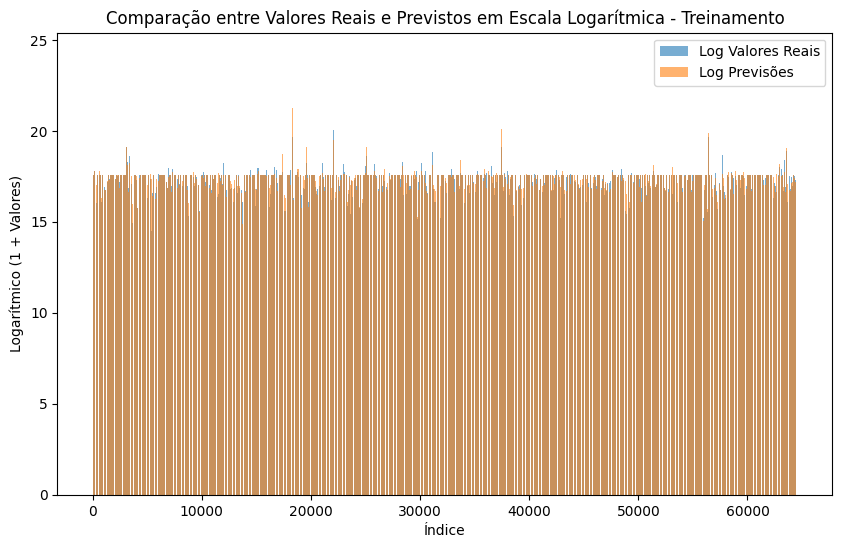

In [74]:
# Comparar os valores reais e os valores previstos logarítmicos
y_val_log = np.log1p(y_val_split)
y_pred_log = np.log1p(y_val_pred)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_val_log)), y_val_log, alpha=0.6, label='Log Valores Reais')
plt.bar(range(len(y_pred_log)), y_pred_log, alpha=0.6, label='Log Previsões')
plt.xlabel('Índice')
plt.ylabel('Logarítmico (1 + Valores)')
plt.title('Comparação entre Valores Reais e Previstos em Escala Logarítmica - Treinamento')
plt.legend()
plt.show()

Teste

In [75]:
X_test = df_test.drop('TradePrice', axis=1)

# Fazer previsões no conjunto de teste
y_pred = model2.predict(X_test)

# adicionar as previsões ao df_test
df_test['Predicted_TradePrice'] = y_pred

#save csv
df_test.to_csv('test_houses_predictions.csv', index=False)

Visualização dos resultados


Area x Preço de venda


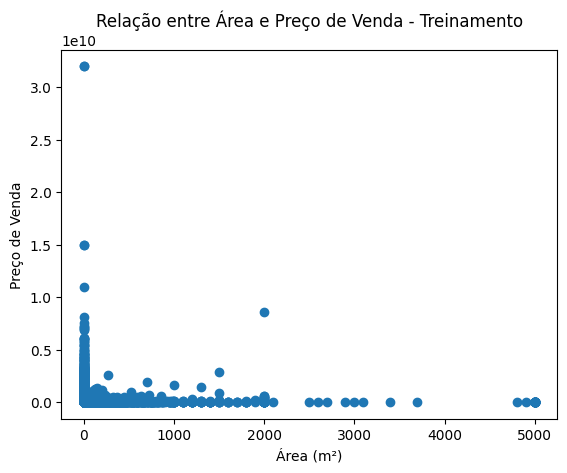

In [76]:
plt.scatter(df_train['Area'], df_train['TradePrice'])
plt.title('Relação entre Área e Preço de Venda - Treinamento')
plt.xlabel('Área (m²)')
plt.ylabel('Preço de Venda')
plt.show()

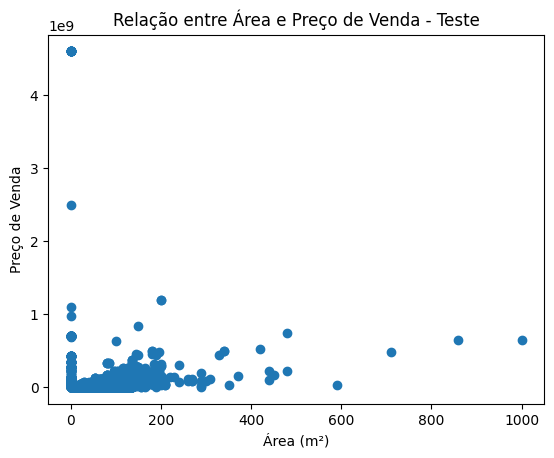

In [77]:
plt.scatter(df_test['Area'], df_test['Predicted_TradePrice'])
plt.title('Relação entre Área e Preço de Venda - Teste')
plt.xlabel('Área (m²)')
plt.ylabel('Preço de Venda')
plt.show()

In [78]:
print(df_train['TradePrice'].describe())

count    3.227790e+05
mean     4.375803e+07
std      1.321678e+08
min      1.000000e+00
25%      2.700000e+07
50%      4.363526e+07
75%      4.363526e+07
max      3.200000e+10
Name: TradePrice, dtype: float64


In [79]:
print(df_test['Predicted_TradePrice'].describe())

count    7.695000e+04
mean     3.916706e+07
std      6.561297e+07
min      2.015000e+03
25%      2.800000e+07
50%      4.363526e+07
75%      4.363526e+07
max      4.600000e+09
Name: Predicted_TradePrice, dtype: float64


O dataset de teste, no geral, possui imóveis menores e com menor valor de mercado que os apresentados nos dados de treinamento

random forest, o modelo não generaliza bem no teste e no treinamento, underfitting

Area

In [80]:
print(df_train['Area'].describe())

count    322779.000000
mean         23.867188
std          72.540562
min           0.000000
25%           0.000000
50%           0.000000
75%          45.000000
max        5000.000000
Name: Area, dtype: float64


In [81]:
print(df_test['Area'].describe())

count    76950.000000
mean        22.661517
std         30.424686
min          0.000000
25%          0.000000
50%          0.000000
75%         45.000000
max       1000.000000
Name: Area, dtype: float64


MinTimeToNearestStation

In [82]:
print(df_train['MinTimeToNearestStation'].describe())

count    322779.000000
mean         11.025319
std          11.154988
min           0.000000
25%           5.000000
50%           9.000000
75%          13.000000
max         120.000000
Name: MinTimeToNearestStation, dtype: float64


In [83]:
print(df_test['MinTimeToNearestStation'].describe())

count    76950.000000
mean        11.185727
std         11.235594
min          0.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        120.000000
Name: MinTimeToNearestStation, dtype: float64


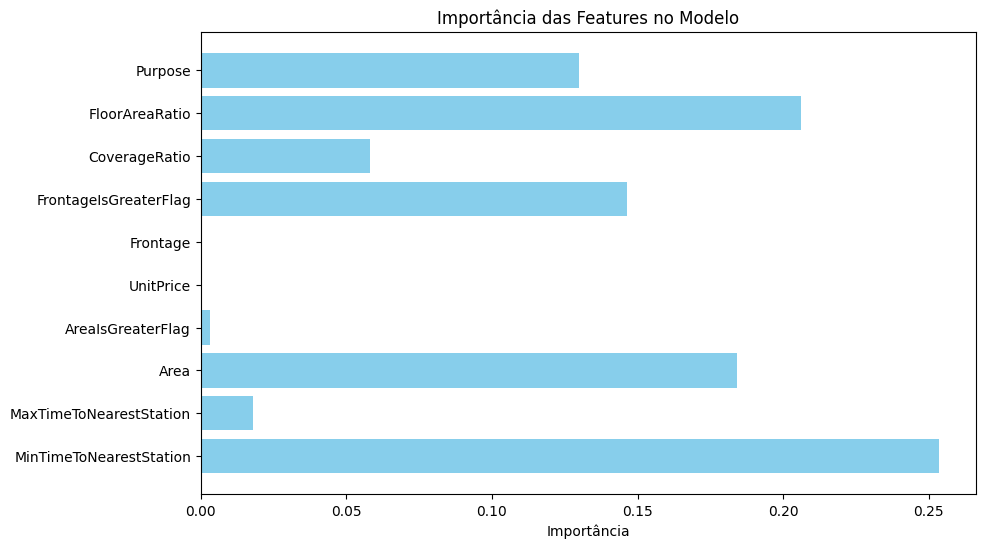

In [84]:
# Obtendo a importância das features do modelo
importances = model2.feature_importances_
features = X_test.columns

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Features no Modelo')
plt.show()